In [1]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\kalya\\Downloads\\glass.data",
               names=["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])
df.sample(10)

Id number       RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  \
29          30  1.51784  13.08  3.49  1.28  72.86  0.60   8.49  0.0  0.00   
188        189  1.52247  14.86  2.20  2.06  70.26  0.76   9.76  0.0  0.00   
2            3  1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.0  0.00   
38          39  1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00   
68          69  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.0  0.16   
82          83  1.51646  13.41  3.55  1.25  72.81  0.68   8.10  0.0  0.00   
116        117  1.51829  13.24  3.90  1.41  72.33  0.55   8.31  0.0  0.10   
170        171  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.0  0.00   
113        114  1.51892  13.46  3.83  1.26  72.55  0.57   8.21  0.0  0.14   
160        161  1.51832  13.33  3.34  1.54  72.14  0.56   8.99  0.0  0.00   

     Type of glass  
29               1  
188              7  
2                1  
38               1  
68               1  
82               2  
116              2  
170              5  
113              2  
160              3

## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [3]:
# Check Missing Values
df.isnull().values.any()

False

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


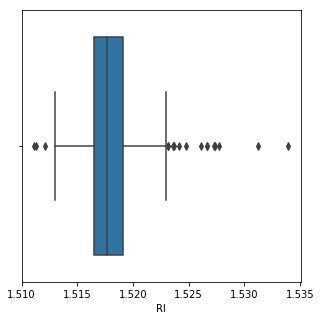

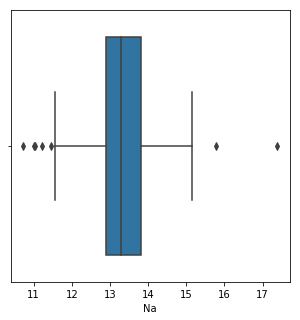

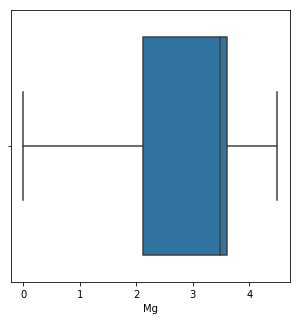

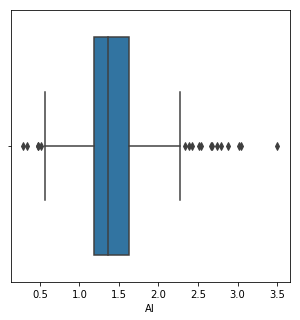

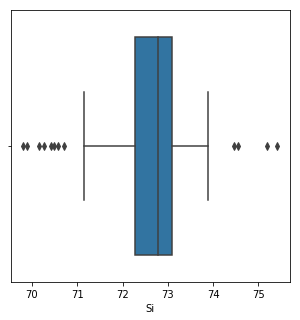

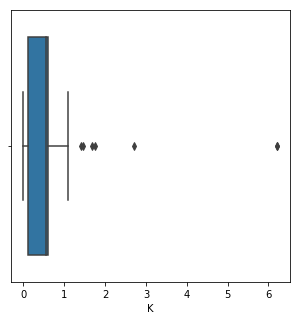

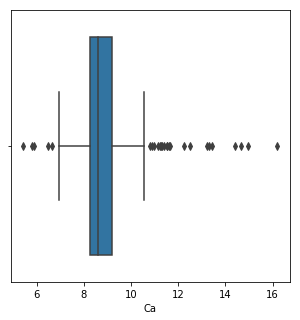

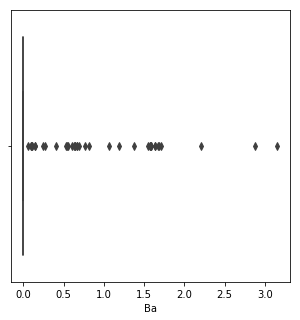

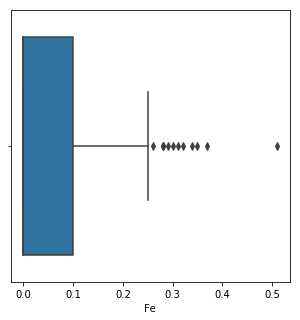

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

col=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
for i in col:
    fig, axs = plt.subplots(figsize = (5,5))
    sns.boxplot(x = i, data = df, ax=axs);
    plt.show()

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [5]:
df.var()
# Drop the variables RI and Fe which have very less variance
df_feature=df.drop(labels=["RI","Fe","Id number","Type of glass"],axis=1)
df_labels=df["Type of glass"]

Id number        3834.166667
RI                  0.000009
Na                  0.666841
Mg                  2.080540
Al                  0.249270
Si                  0.599921
K                   0.425354
Ca                  2.025366
Ba                  0.247227
Fe                  0.009494
Type of glass       4.425716
dtype: float64

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

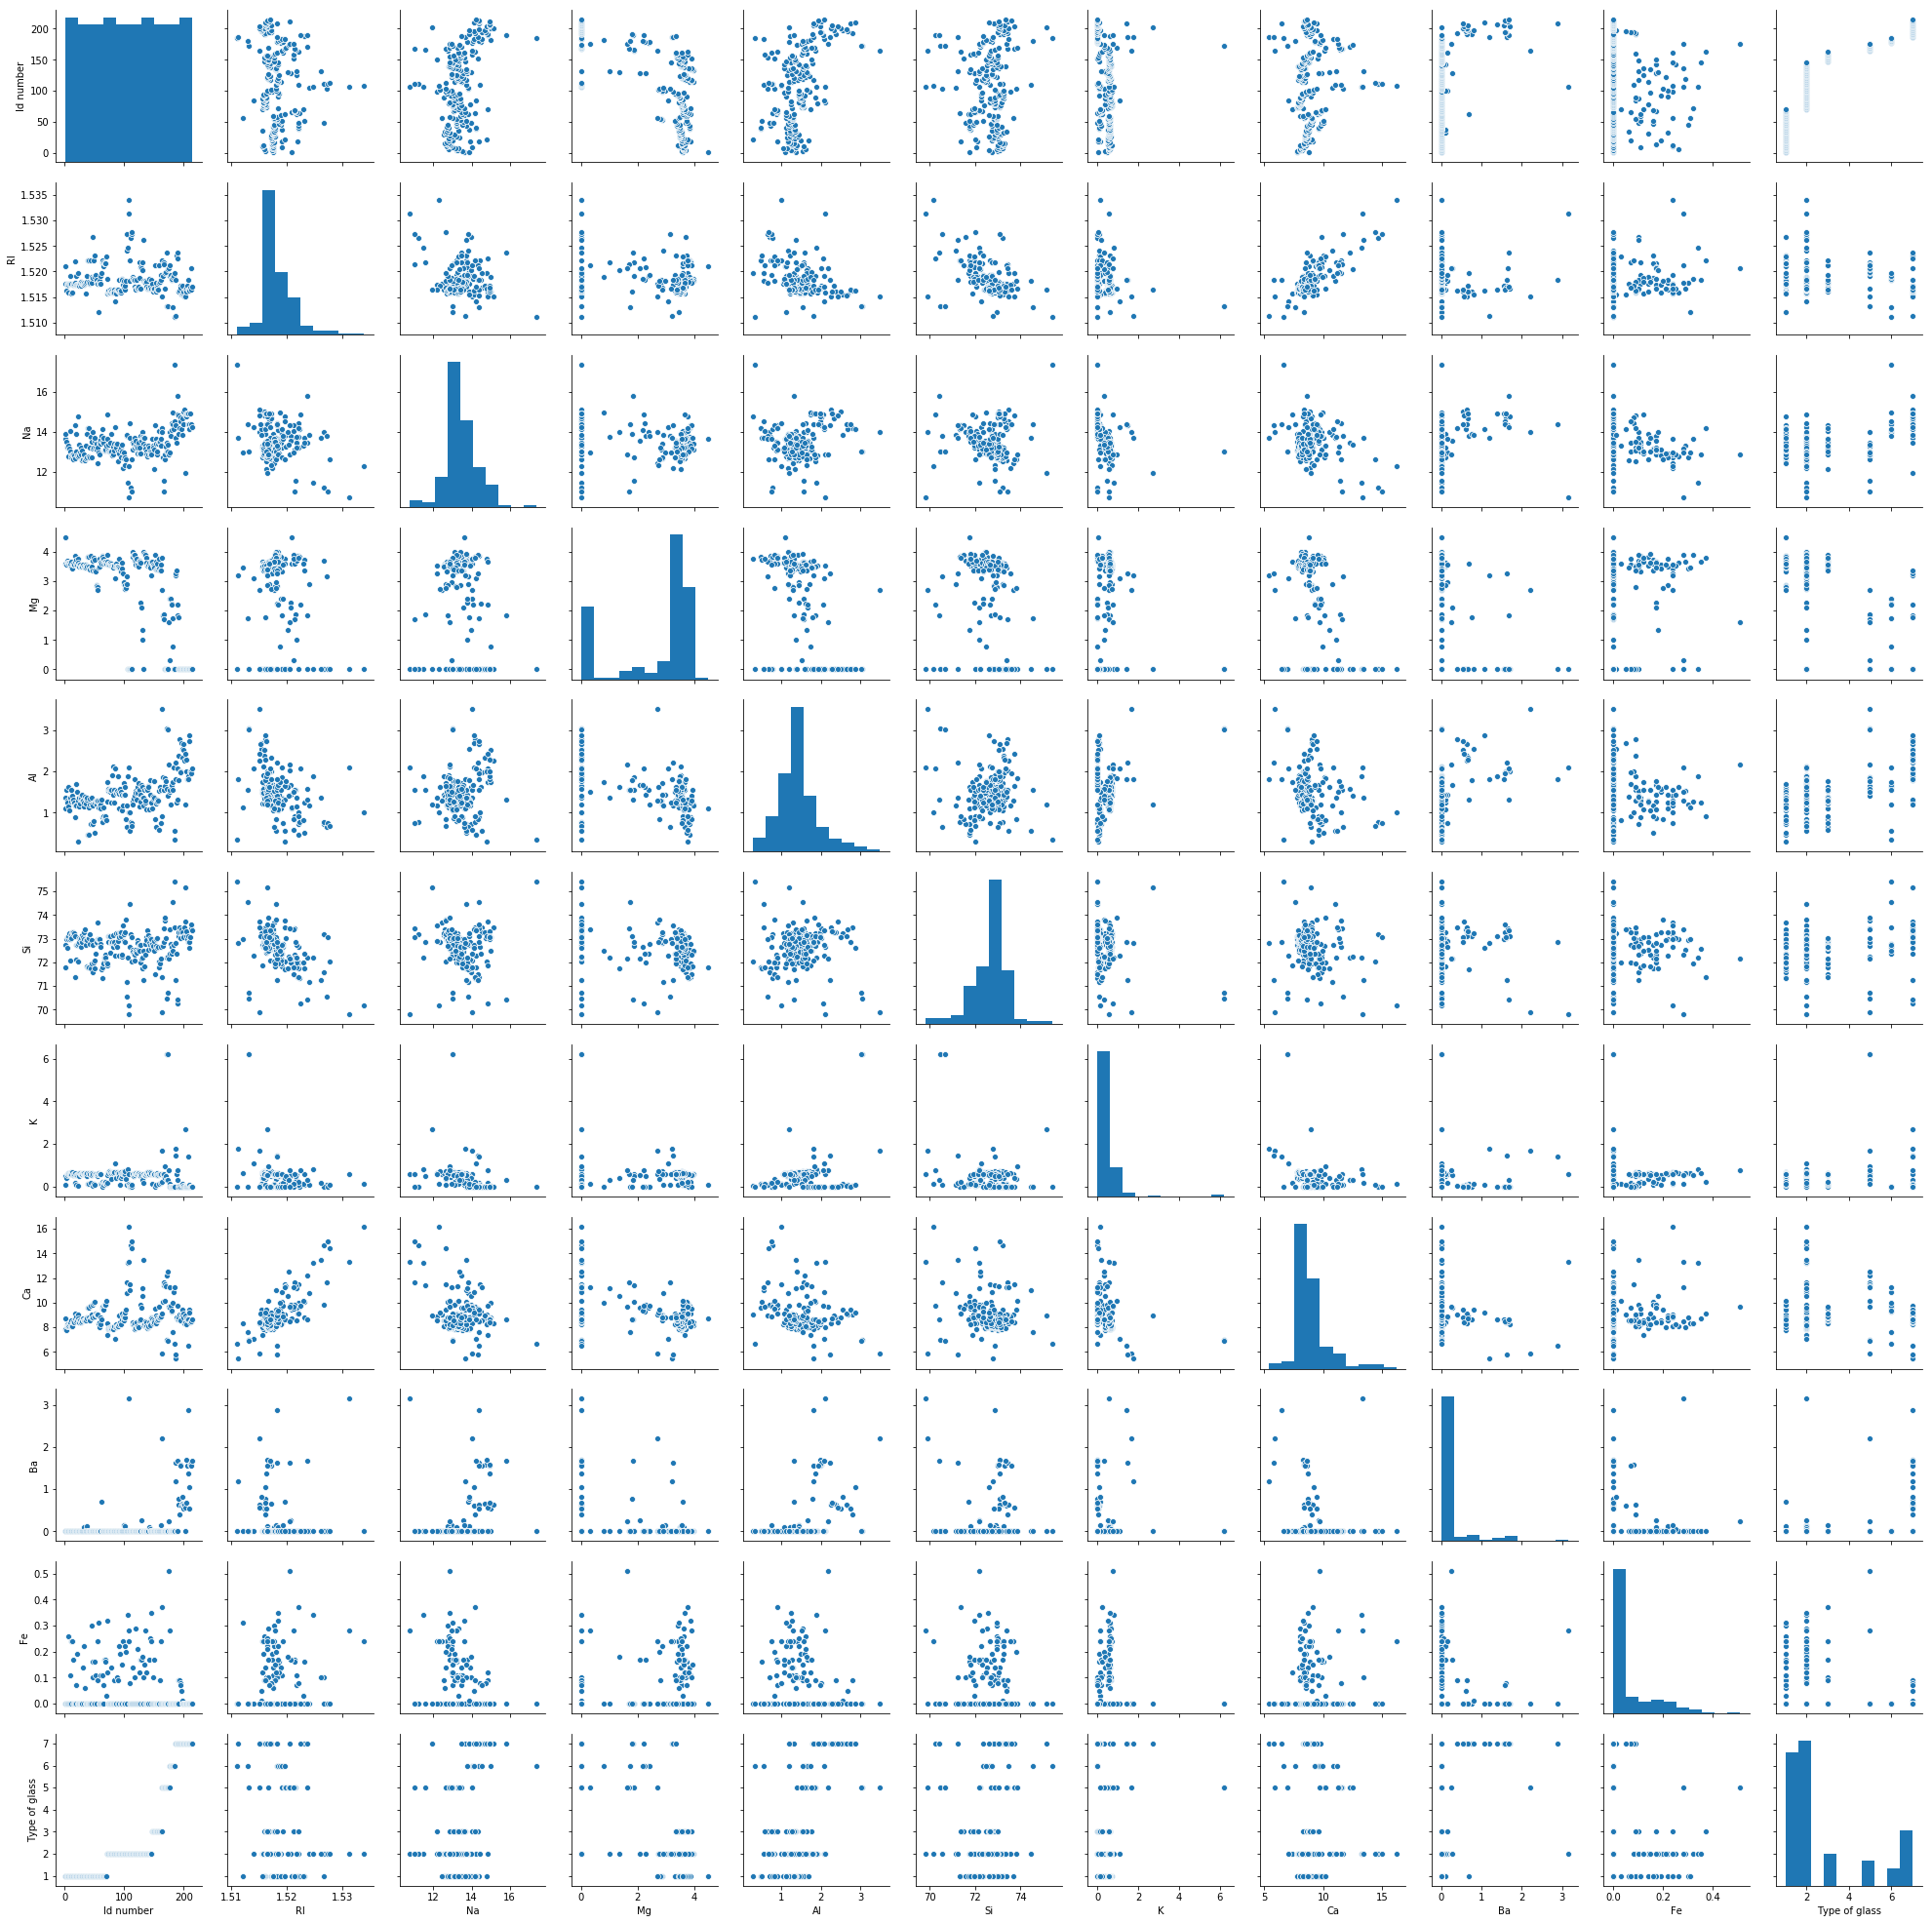

In [6]:
# Scatter plot for all variables
sns.pairplot(df)


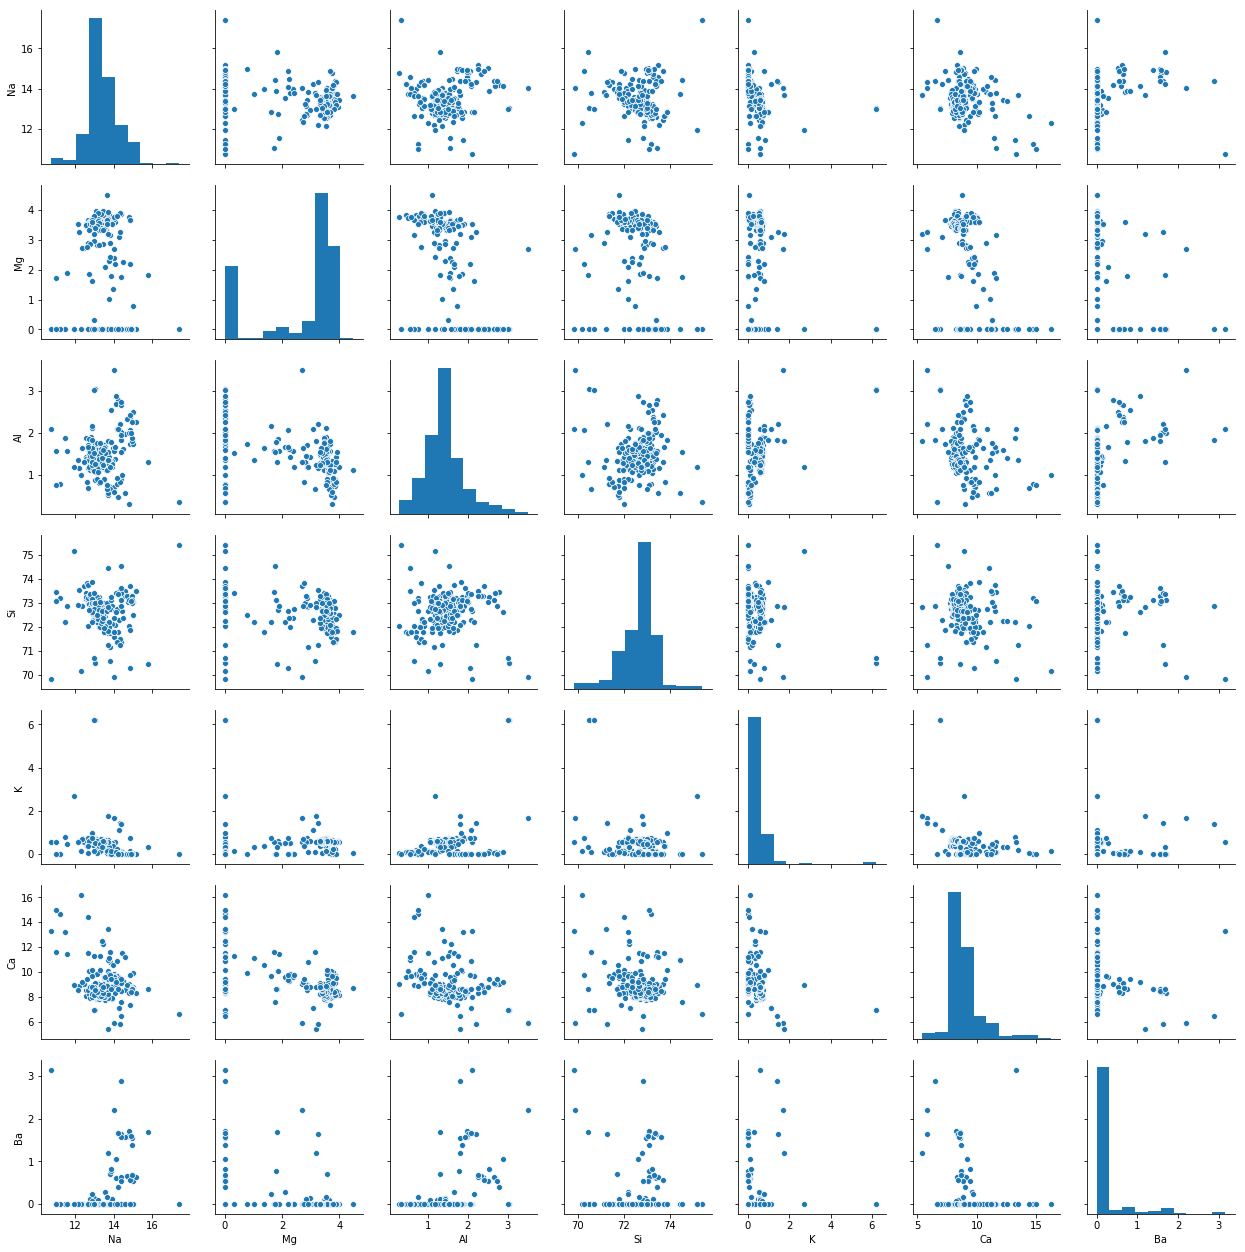

In [7]:
# Scatter plot for independent variables
sns.pairplot(df_feature)


## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [8]:
from sklearn.model_selection import train_test_split
feature_df_train, feature_df_test, df_labels_train, df_labels_test = train_test_split(df_feature, df_labels, test_size=0.30, random_state=9)

from sklearn.neighbors import KNeighborsClassifier# Call Nearest Neighbour algorithm
from sklearn.metrics import accuracy_score

mList = [3,6,9]
for k in mList:
    
    NNH = KNeighborsClassifier(n_neighbors= k  )
    NNH.fit(feature_df_train, df_labels_train)
    predicted_labels = NNH.predict(feature_df_test)
    print("Score for K value: {} is {}".format(k,accuracy_score(df_labels_test,predicted_labels)))
     
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Score for K value: 3 is 0.7384615384615385


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Score for K value: 6 is 0.7230769230769231


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

Score for K value: 9 is 0.7538461538461538


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, feature_df_train, df_labels_train, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
print (cv_scores)
print (k_neighbors)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

[0.6704411764705882, 0.6694771241830066, 0.6359803921568626, 0.5963562091503268, 0.5691339869281046, 0.5954084967320262, 0.5948529411764706, 0.5819281045751634, 0.5559313725490196, 0.5363235294117648]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


0.3295588235294118

0

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

(0, 25)

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

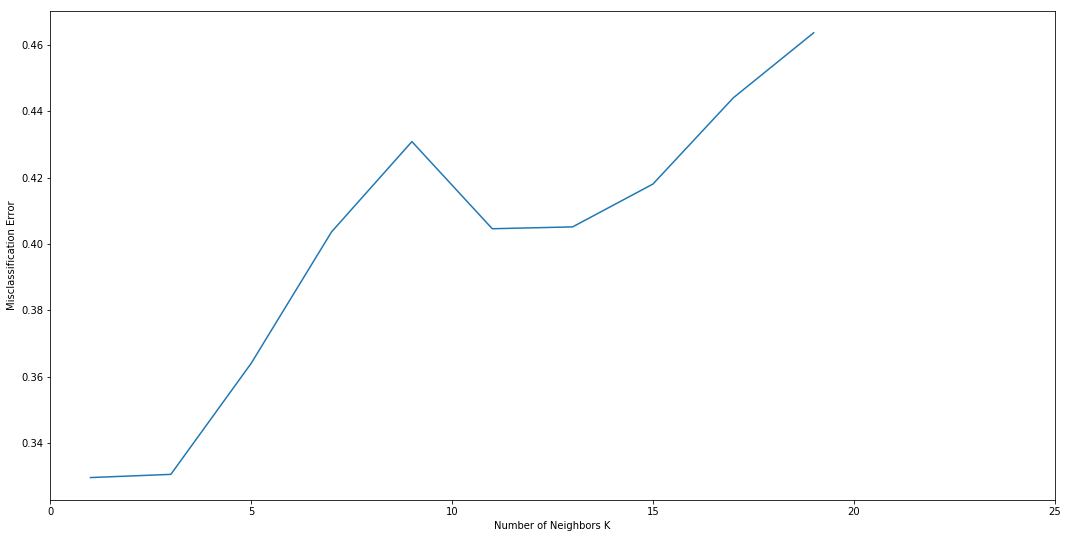

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()